<a href="https://colab.research.google.com/github/itsshln/pr1/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Анализ целевой переменной Y с точки зрения статистики**

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML/diamond.csv')
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [5]:
for column in df.columns:
  print(f'колонка: {column}')

колонка: Carat Weight
колонка: Cut
колонка: Color
колонка: Clarity
колонка: Polish
колонка: Symmetry
колонка: Report
колонка: Price


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [7]:
print(df.isnull().sum())

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [17]:
np.random.seed(52)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Carat Weight'] = np.nan

In [18]:
print(df_test_nan.isnull().sum())

Carat Weight    5
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [19]:
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum())


# Удаление строк с пропусками
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [40]:
df['is_best_diamond'] = np.where(df['Price'] >= 5000, 1, 0).astype(int)

In [41]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price', 'is_best_diamond'],
      dtype='object')

In [46]:
Y = df['is_best_diamond']
X = df.drop('is_best_diamond', axis=1)

In [47]:
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Carat Weight,Price
0,1.10,5169
1,0.83,3470
2,0.85,3183
3,0.91,4370
4,0.83,3171
...,...,...
5995,1.03,6250
5996,1.00,5328
5997,1.02,6157
5998,1.27,11206


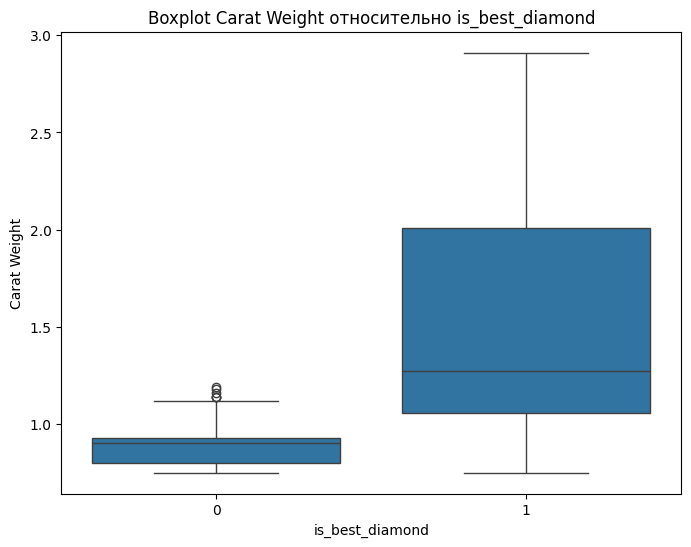

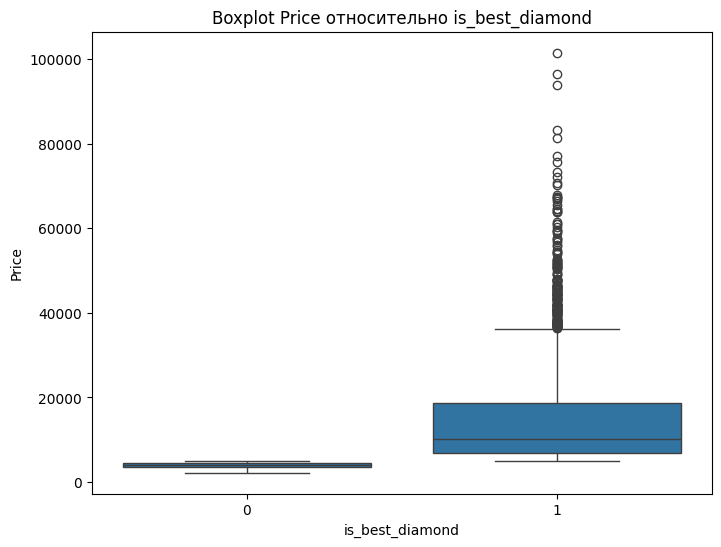

In [48]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_best_diamond', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_best_diamond')
    plt.show()

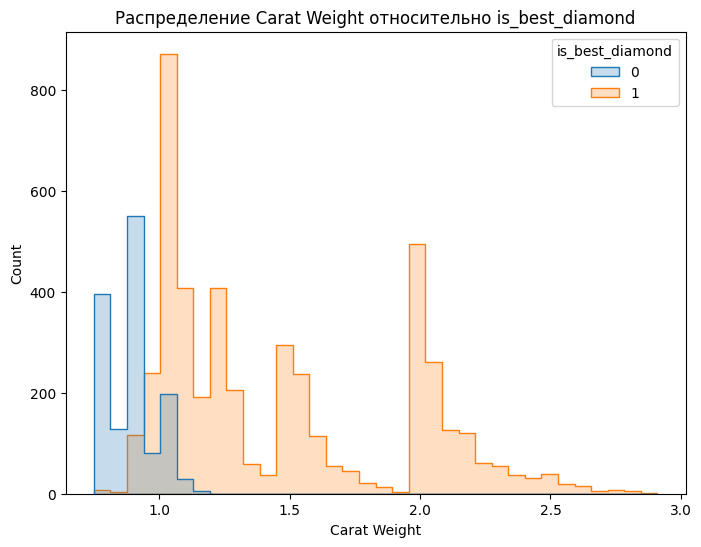

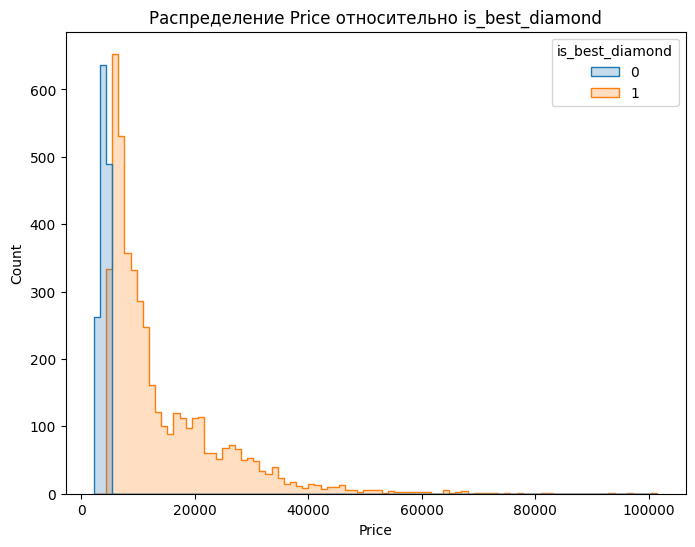

In [63]:
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sns.histplot(data=df, x=col, hue='is_best_diamond', element="step", stat="count", common_norm=False)
  plt.title(f'Распределение {col} относительно is_best_diamond')
  plt.show()

In [64]:
desc_stats_numeric = df.groupby('is_best_diamond')[df.select_dtypes(include=[np.number]).columns].describe()
desc_stats_categorical = df.groupby('is_best_diamond')[df.select_dtypes(include=['object']).columns].describe()

In [65]:
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_best_diamond')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для Carat Weight:

                  count      mean       std   min     25%   50%   75%   max
is_best_diamond                                                            
0                1388.0  0.889524  0.091632  0.75  0.8000  0.90  0.93  1.19
1                4612.0  1.468443  0.462958  0.75  1.0575  1.27  2.01  2.91


Описательная статистика для Price:

                  count          mean           std     min      25%      50%  \
is_best_diamond                                                                 
0                1388.0   3967.093660    670.654759  2184.0  3452.50   4063.0   
1                4612.0  14146.389853  10527.687220  5003.0  6809.75  10155.5   

                      75%       max  
is_best_diamond                      
0                 4523.00    4997.0  
1                18613.25  101561.0  




In [66]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


Cut                         Color                  Clarity  \
                count unique        top  freq count unique top  freq   count   
is_best_diamond                                                                
0                1388      5  Very Good   617  1388      6   I   307    1388   
1                4612      5      Ideal  2076  4612      6   G  1261    4612   

                        ... Polish       Symmetry                  Report  \
                unique  ...    top  freq    count unique top  freq  count   
is_best_diamond         ...                                                 
0                    6  ...     VG   661     1388      4  VG   643   1388   
1                    7  ...     EX  1970     4612      4  VG  1774   4612   

                                   
                unique  top  freq  
is_best_diamond                    
0                    2  GIA  1262  
1                    2  GIA  4004  

[2 rows x 24 columns]

1. Cut:
Ideal: 2076 экземпляров из 4612 – это лучший вариант, обеспечивающий максимальный блеск и свечение.
Very Good: 617 экземпляров из 1388 – качество чуть ниже идеала.

2. Color:
Наиболее распространенный цвет для идеальных бриллиантов – G (1261 экземпляр), что указывает на отсутствие заметного цвета и высокий уровень прозрачности.

3. Clarity:
Максимальное количество бриллиантов имеет оценку I (307 экземпляров) в характеристике "Неоптимальная чистота", что предполагает некоторые видимые недостатки, однако это не обязательно влияет на красоту камня.

4. Polish:
Многие из идеальных бриллиантов имеют рейтинг EX (excellent) по полировке (1970 экземпляров), что указывает на высокое качество обработки.

5. Symmetry:
Четверть идеальных бриллиантов имеют оценку VG (very good) по симметрии (1774 экземпляра), что также указывает на высокое качество и привлекательность.

6. Report:
Большинство бриллиантов, как идеальных, так и очень хороших, имеют отчет от GIA (Gemmological Institute of America) – 4004 экземпляра, что подтверждает их аутентичность и качество.

Вывод: Бриллианты категории 'ideal' имеют более высокие показатели по всем характеристикам, в то время как 'very good' вариант также остается привлекательным выбором для покупателей, стремящихся к качеству без излишних затрат.

**2. Расчет теста Пирсона**

In [67]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Carat Weight,Price,is_best_diamond
Carat Weight,1.000000,0.858562,0.513230
Price,0.858562,1.000000,0.421511
is_best_diamond,0.513230,0.421511,1.000000


Carat Weight and Price

Коэффициент корреляции : 0,858562

Интерпретация :

Существует сильная положительная корреляция между весом в каратах и ​​ценой бриллианта. Это означает, что с появлением бриллианта цена также, как правило, увеличивается. Это ожидаемо, поскольку более крупные бриллианты обычно стоят дороже.

Carat Weight and is_best_diamond

Коэффициент корреляции : 0,513230

Интерпретация :

Существует умеренная положительная корреляция между весом в каратах и ​​темой, которая является бриллиантом лучше. Это может свидетельствовать о том, что более крупные бриллианты имеют большие шансы быть классифицированными как лучшие, но это не является строгим правилом.

Price and is_best_diamond

Коэффициент корреляции : 0,421511

Интерпретация :

Существует умеренная положительная корреляция между ценой и темой, которая является бриллиантом лучше. Это может означать, что более дорогие бриллианты имеют некоторое влияние на то, чтобы быть классифицированными как лучшие, хотя связь не так сильна, как в случае с весом и ценой.

3. Машинное обучение

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [69]:
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report', 'Price']


In [70]:
X_processed = X.copy()
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)

In [71]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Price_70683,Price_72195,Price_73209,Price_75630,Price_77033,Price_81399,Price_83145,Price_93813,Price_96493,Price_101561
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['Carat Weight']


In [74]:
scaler = MinMaxScaler()
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Price_70683,Price_72195,Price_73209,Price_75630,Price_77033,Price_81399,Price_83145,Price_93813,Price_96493,Price_101561
0,0.162037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.037037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.046296,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.074074,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.037037,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5996,0.115741,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5997,0.125000,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5998,0.240741,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
def train_and_evaluate(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=52, stratify=Y)

    model = LogisticRegression(max_iter=1000)

    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [80]:
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9948
Точность на тестовой выборке: 0.9633

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      0.87      0.92       278
           1       0.96      0.99      0.98       922

    accuracy                           0.96      1200
   macro avg       0.96      0.93      0.95      1200
weighted avg       0.96      0.96      0.96      1200



In [81]:
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

           Feature  Coefficient
0     Carat Weight    20.369435
9          Color_I    -2.185501
11     Clarity_SI1    -1.479782
10      Clarity_IF     1.392383
8          Color_H    -1.271945
...            ...          ...
1187    Price_5450     0.000000
1179    Price_5434     0.000000
2135    Price_7896     0.000000
1177    Price_5432     0.000000
3116   Price_12117     0.000000

[4843 rows x 2 columns]


**4. Построение модели логистической регрессии для предсказания качества брилианта**

4.1 Кросс-валидация модели

In [82]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9695
Отклонение точности: 0.0046


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=52, stratify=Y)

4.2 Построение ROC-кривой

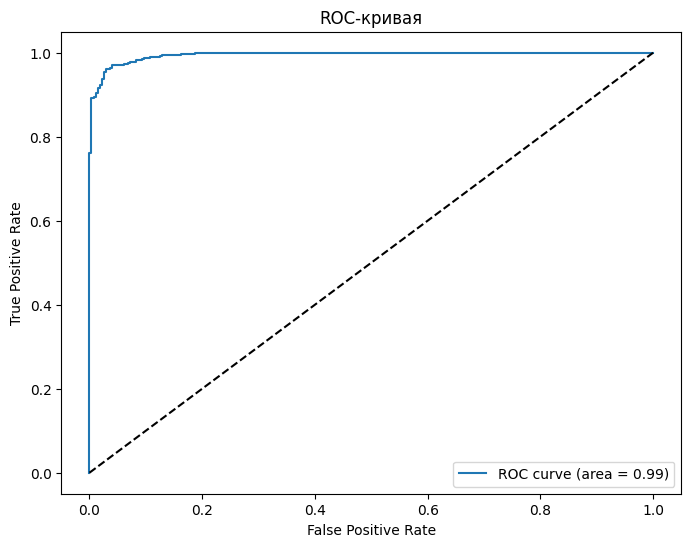

In [84]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()